DATA ANALYSE: Predict H1N1 and Seasonal Flu Vaccines

Authors: Xinsheng Yao

Contribution

1. paper part

Xinsheng Yao:

Abstract 

Introduction

Literature review 

Methodology 1,3,4,5,6,7,8

Discussion paragraph 1

Conclusion

Yi Yuan:
Methodology 2,9,10

Result

Discussion paragraph 2

2. code part

Each person has their own Python file, focusing only on their own part.


1. Load python packages which we need

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

2. Load training features dataset and training labels dataset

In [3]:
df_features = pd.read_csv('training_set_features.csv')

In [4]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
df_labels = pd.read_csv('training_set_labels.csv')

3. Combining datasets

In [6]:
df_features[['h1n1_vaccine','seasonal_vaccine']] = df_labels[['h1n1_vaccine','seasonal_vaccine']].loc[0:26706]

4. Divide dataset into two groups

In [7]:
# df_psychological represents people's thoughts about the flu and their behaviors 
df_psychological = df_features.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]

# df_physiological represents people's status and their personal information.
df_physiological = df_features.iloc[:,[22,23,24,25,26,27,28,29,30,31,32,33,34,35]]

5. Dealing with duplicates

In [8]:
df_features[df_features.duplicated(keep=False)]

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine


6. Dealing with irrelevant data

In [9]:
print(df_features[df_features.isna().any(axis=1)].shape)
df_features[df_features.isna().any(axis=1)]

(20270, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,NaN,NaN,0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [10]:
df_features['employment_industry'].unique()

array([nan, 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], dtype=object)

In [11]:
df_features['employment_occupation'].unique()

array([nan, 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

In [12]:
df_features['hhs_geo_region'].unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In [13]:
# According to the analyse below, I found that column employment_industry and employment_occupation have too much NaN data and are not relevant with our result.

In [14]:
df_features = df_features.drop(labels=['employment_industry','employment_occupation'],axis=1)
df_physiological = df_physiological.drop(labels=['employment_industry','employment_occupation'],axis=1)
df_features = df_features.drop(labels='hhs_geo_region',axis=1)

In [15]:
# Drop the repeated line
df_features = df_features.drop(labels='respondent_id',axis=1)

7. Find missing data

In [16]:
print(df_features[df_features.isna().any(axis=1)].shape)
df_features[df_features.isna().any(axis=1)]

(14913, 34)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,1.0,0,1
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,Female,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0,1
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0,1


In [17]:
df_features = df_features.dropna(thresh=32)  # drop rows that have less than 32 non-NaN, that is equal to drop data with more than 2 NaN.
df_features[df_features.isna().any(axis=1)]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0,0
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26696,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,Male,NaN,Married,Own,Employed,"MSA, Principle City",1.0,0.0,1,1
26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,1.0,0,1
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,Female,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0,1
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0


In [18]:
print(df_features[df_features.isna().any(axis=1)].shape)

(11408, 34)


In [19]:
df_psychological[df_psychological.isna().any(axis=1)]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,NaN,5.0,4.0,2.0,4.0,4.0,2.0
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,NaN,4.0,2.0,5.0,5.0,4.0,5.0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0


In [20]:
# Most of NaN data is from column health_insurance, so I chose to drop this column.

In [21]:
df_features = df_features.drop(labels='health_insurance',axis=1)
df_psychological = df_psychological.drop(labels='health_insurance',axis=1)

In [22]:
df_psychological[df_psychological.isna().any(axis=1)]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0
42,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,3.0,1.0,5.0
44,NaN,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,1.0,1.0
57,3.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,4.0,4.0,4.0,1.0
64,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3.0,3.0,2.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26682,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,1.0
26687,3.0,2.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,5.0,5.0,5.0,4.0,1.0
26692,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,4.0,3.0,2.0,4.0,1.0,2.0
26695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,3.0,1.0,4.0,3.0,1.0,1.0


8. Dealing with missing data (psychological part)

In [23]:
cols_to_fillna = df_features.columns[:19] # select first 19 columns

for col in cols_to_fillna:
    df_features[col] = df_features[col].fillna(df_features.groupby(['age_group','education','race','sex'])[col].transform(lambda x:int(np.mean(x))))

In [24]:
df_features[df_features.isna().any(axis=1)]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
16,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,NaN,Not in Labor Force,"MSA, Principle City",0.0,0.0,1,1
24,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,Male,NaN,Not Married,Own,Unemployed,Non-MSA,2.0,0.0,0,0
26,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Female,NaN,Married,NaN,Employed,"MSA, Principle City",1.0,2.0,1,1
29,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0,0
31,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Female,NaN,Not Married,Own,Not in Labor Force,"MSA, Not Principle City",3.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26660,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Female,NaN,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
26665,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,Female,NaN,Not Married,Own,Not in Labor Force,Non-MSA,1.0,0.0,0,0
26667,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,Male,NaN,Not Married,Rent,Unemployed,"MSA, Not Principle City",3.0,1.0,0,0
26686,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Female,Below Poverty,Not Married,Own,NaN,Non-MSA,2.0,0.0,0,1


9. Dealing with missing data (physiological part)

In [25]:
# I dropped NaN value because the rest of values are from physiological part.
df_features.dropna(inplace=True)

In [26]:
# Dealing with unordered data
df_features = pd.get_dummies(df_features,columns=['sex'],prefix_sep='_',dummy_na=False,drop_first=False)
df_features = pd.get_dummies(df_features,columns=['rent_or_own'],prefix_sep='_',dummy_na=False,drop_first=False)
df_features = pd.get_dummies(df_features,columns=['race'],prefix_sep='_',dummy_na=False,drop_first=False)
df_features = pd.get_dummies(df_features,columns=['marital_status'],prefix_sep='_',dummy_na=False,drop_first=False)
df_features = pd.get_dummies(df_features,columns=['employment_status'],prefix_sep='_',dummy_na=False,drop_first=False)
df_features = pd.get_dummies(df_features,columns=['census_msa'],prefix_sep='_',dummy_na=False,drop_first=False)

In [27]:
# Dealing with ordered data
df_features['age_group'].unique()

array(['55 - 64 Years', '35 - 44 Years', '65+ Years', '45 - 54 Years',
       '18 - 34 Years'], dtype=object)

In [28]:
df_features.loc[df_features['age_group'] == '18 - 34 Years', 'age_group'] = 1
df_features.loc[df_features['age_group'] == '35 - 44 Years', 'age_group'] = 2
df_features.loc[df_features['age_group'] == '45 - 54 Years', 'age_group'] = 3
df_features.loc[df_features['age_group'] == '55 - 64 Years', 'age_group'] = 4
df_features.loc[df_features['age_group'] == '65+ Years', 'age_group'] = 5

In [29]:
df_features['education'].unique()

array(['< 12 Years', '12 Years', 'Some College', 'College Graduate'],
      dtype=object)

In [30]:
df_features.loc[df_features['education'] == '< 12 Years', 'education'] = 1
df_features.loc[df_features['education'] == '12 Years', 'education'] = 2
df_features.loc[df_features['education'] == 'Some College', 'education'] = 3
df_features.loc[df_features['education'] == 'College Graduate', 'education'] = 4

In [31]:
df_features['income_poverty'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
      dtype=object)

In [32]:
df_features.loc[df_features['income_poverty'] == 'Below Poverty', 'income_poverty'] = 1
df_features.loc[df_features['income_poverty'] == '<= $75,000, Above Poverty', 'income_poverty'] = 2
df_features.loc[df_features['income_poverty'] == '> $75,000', 'income_poverty'] = 3

In [33]:
df_features

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race_Other or Multiple,race_White,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,1,0,1,0,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,0,1,1,0,0,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,1,0,1,0,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,1,0,1,0,0,1,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,1,0,1,0,1,0,0,1,0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,1,0,1,0,0,0,1
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,1,0,1,1,0,0,0,1,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,1


In [34]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20477 entries, 0 to 26706
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   h1n1_concern                          20477 non-null  float64
 1   h1n1_knowledge                        20477 non-null  float64
 2   behavioral_antiviral_meds             20477 non-null  float64
 3   behavioral_avoidance                  20477 non-null  float64
 4   behavioral_face_mask                  20477 non-null  float64
 5   behavioral_wash_hands                 20477 non-null  float64
 6   behavioral_large_gatherings           20477 non-null  float64
 7   behavioral_outside_home               20477 non-null  float64
 8   behavioral_touch_face                 20477 non-null  float64
 9   doctor_recc_h1n1                      20477 non-null  float64
 10  doctor_recc_seasonal                  20477 non-null  float64
 11  chronic_med_con

In [35]:
#-----------------------------------------------------

In [36]:
# 1. Linear regression method

10. Show the correlation beween features and labels

In [37]:
df_features.corr()

C:\Users\姚昕晟\AppData\Local\Temp\ipykernel_30132\1530378090.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_features.corr()


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race_Other or Multiple,race_White,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
h1n1_concern,1.000000,0.061011,0.091340,0.234129,0.161707,0.292602,0.263212,0.252462,0.251458,0.154648,...,0.038195,-0.135581,0.036526,-0.036526,-0.061338,0.046928,0.032871,0.001186,-0.005078,0.003865
h1n1_knowledge,0.061011,1.000000,-0.007912,0.077191,0.038704,0.089588,-0.043787,-0.068388,0.090283,0.091640,...,-0.037852,0.150703,0.122297,-0.122297,0.138136,-0.116392,-0.051670,0.047188,0.005597,-0.058263
behavioral_antiviral_meds,0.091340,-0.007912,1.000000,0.045211,0.143208,0.061054,0.105143,0.122532,0.066271,0.055768,...,0.020987,-0.126356,-0.019943,0.019943,-0.000822,-0.012381,0.027607,-0.022835,0.019718,0.005287
behavioral_avoidance,0.234129,0.077191,0.045211,1.000000,0.061527,0.333091,0.225915,0.220702,0.330539,0.063620,...,-0.003482,-0.000470,0.055753,-0.055753,-0.019333,0.013861,0.012304,0.030035,-0.020343,-0.012668
behavioral_face_mask,0.161707,0.038704,0.143208,0.061527,1.000000,0.078004,0.181047,0.165032,0.110037,0.089465,...,0.044290,-0.101131,-0.006377,0.006377,-0.035656,0.029986,0.013455,-0.003933,0.020999,-0.017068
behavioral_wash_hands,0.292602,0.089588,0.061054,0.333091,0.078004,1.000000,0.193263,0.190545,0.363686,0.088519,...,0.006223,-0.059912,0.047852,-0.047852,-0.007711,0.014652,-0.014146,0.018570,-0.012298,-0.008117
behavioral_large_gatherings,0.263212,-0.043787,0.105143,0.225915,0.181047,0.193263,1.000000,0.586433,0.246427,0.083527,...,0.053325,-0.127672,-0.027186,0.027186,-0.153194,0.135492,0.043913,-0.024195,-0.027372,0.054900
behavioral_outside_home,0.252462,-0.068388,0.122532,0.220702,0.165032,0.190545,0.586433,1.000000,0.261764,0.070023,...,0.046552,-0.142363,-0.030708,0.030708,-0.159871,0.136730,0.055574,-0.018711,-0.018305,0.039532
behavioral_touch_face,0.251458,0.090283,0.066271,0.330539,0.110037,0.363686,0.246427,0.261764,1.000000,0.087333,...,0.009102,-0.053434,0.038664,-0.038664,-0.031427,0.032786,-0.001413,0.004548,-0.022527,0.017945
doctor_recc_h1n1,0.154648,0.091640,0.055768,0.063620,0.089465,0.088519,0.083527,0.070023,0.087333,1.000000,...,0.006224,-0.019609,0.020669,-0.020669,-0.034785,0.043395,-0.016400,-0.002307,0.005816,-0.003372


11. Build a model to fit parameters

In [40]:
corr_values = df_features.corr()['h1n1_vaccine']
relevant_cols = corr_values_h1n1[abs(corr_values_h1n1) > 0.15].index.tolist()
relevant_cols.remove('h1n1_vaccine')
relevant_features = df_features[relevant_cols]
relevant_features

C:\Users\姚昕晟\AppData\Local\Temp\ipykernel_30132\2458134326.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df_features.corr()['h1n1_vaccine']


,doctor_recc_h1n1,doctor_recc_seasonal,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,seasonal_vaccine
0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0
1,0.0,0.0,0.0,5.0,4.0,4.0,2.0,1
3,0.0,1.0,0.0,3.0,3.0,5.0,4.0,1
4,0.0,0.0,0.0,3.0,3.0,3.0,1.0,0
5,0.0,1.0,0.0,5.0,2.0,5.0,4.0,0
...,...,...,...,...,...,...,...,...
26701,0.0,0.0,0.0,4.0,2.0,4.0,2.0,0
26702,0.0,0.0,0.0,3.0,1.0,5.0,2.0,0
26703,1.0,1.0,1.0,4.0,2.0,5.0,1.0,0
26705,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0


In [39]:
corr_values = df_features.corr()['seasonal_vaccine']
relevant_cols = corr_values[abs(corr_values) > 0.15].index.tolist()
relevant_cols.remove('seasonal_vaccine')
relevant_features = df_features[relevant_cols]
relevant_features

C:\Users\姚昕晟\AppData\Local\Temp\ipykernel_30132\4095412858.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df_features.corr()['seasonal_vaccine']


,h1n1_concern,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,h1n1_vaccine
0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0
1,3.0,0.0,0.0,0.0,5.0,4.0,4.0,2.0,0
3,1.0,0.0,1.0,1.0,3.0,3.0,5.0,4.0,0
4,2.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,0
5,3.0,0.0,1.0,0.0,5.0,2.0,5.0,4.0,0
...,...,...,...,...,...,...,...,...,...
26701,2.0,0.0,0.0,0.0,4.0,2.0,4.0,2.0,0
26702,2.0,0.0,0.0,0.0,3.0,1.0,5.0,2.0,0
26703,1.0,1.0,1.0,0.0,4.0,2.0,5.0,1.0,0
26705,1.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0


In [41]:
df_features[['doctor_recc_h1n1', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'doctor_recc_seasonal','opinion_seas_vacc_effective','h1n1_vaccine','seasonal_vaccine']].corr()

,doctor_recc_h1n1,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,doctor_recc_seasonal,opinion_seas_vacc_effective,h1n1_vaccine,seasonal_vaccine
doctor_recc_h1n1,1.000000,0.106204,0.149444,0.269244,0.105284,0.206248,0.600391,0.105284,0.392093,0.201716
health_worker,0.106204,1.000000,0.049679,0.126933,0.027966,0.096689,0.063281,0.027966,0.183080,0.135506
opinion_h1n1_vacc_effective,0.149444,0.049679,1.000000,0.268133,0.471338,0.258125,0.116500,0.471338,0.272372,0.215923
opinion_h1n1_risk,0.269244,0.126933,0.268133,1.000000,0.219108,0.562555,0.175243,0.219108,0.352905,0.229842
opinion_seas_vacc_effective,0.105284,0.027966,0.471338,0.219108,1.000000,0.344641,0.179381,1.000000,0.184968,0.367518
opinion_seas_risk,0.206248,0.096689,0.258125,0.562555,0.344641,1.000000,0.245181,0.344641,0.276638,0.411071
doctor_recc_seasonal,0.600391,0.063281,0.116500,0.175243,0.179381,0.245181,1.000000,0.179381,0.207300,0.365140
opinion_seas_vacc_effective,0.105284,0.027966,0.471338,0.219108,1.000000,0.344641,0.179381,1.000000,0.184968,0.367518
h1n1_vaccine,0.392093,0.183080,0.272372,0.352905,0.184968,0.276638,0.207300,0.184968,1.000000,0.387831
seasonal_vaccine,0.201716,0.135506,0.215923,0.229842,0.367518,0.411071,0.365140,0.367518,0.387831,1.000000


In [42]:
list_of_features = ['doctor_recc_h1n1', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'doctor_recc_seasonal','opinion_seas_vacc_effective']
h1n1_vaccine_corr = [0.392093,0.183080,0.272372,0.352905,0.184968,0.276638,0.207300,0.184968]
seasonal_vaccine_corr = [0.201716,0.135506,0.215923,0.229842,0.367518,0.411071,0.365140,0.367518]

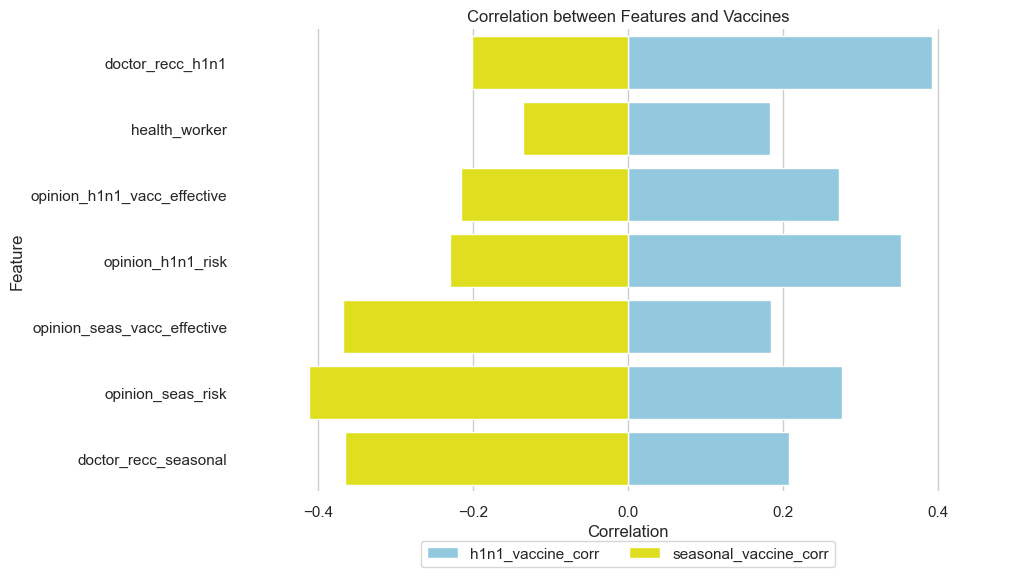

In [43]:
df = pd.DataFrame({'Feature': list_of_features, 'h1n1_vaccine_corr': h1n1_vaccine_corr, 'seasonal_vaccine_corr': seasonal_vaccine_corr})
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))


sns.barplot(x='h1n1_vaccine_corr', y='Feature', color='skyblue', data=df, ax=ax, label='h1n1_vaccine_corr')
sns.barplot(x=-1 * df['seasonal_vaccine_corr'], y='Feature', color='yellow', data=df, ax=ax, label='seasonal_vaccine_corr')

ax.set_xlim(-0.5, 0.5)
ax.set(xlabel='Correlation', ylabel='Feature', title='Correlation between Features and Vaccines')
sns.despine(left=True, bottom=True)

ax.legend(ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.18), frameon=True)

plt.show()

12. Regularize the independent variables

In [44]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1 = scaler.fit_transform(df_features[['doctor_recc_h1n1', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'doctor_recc_seasonal']])

ridge = Ridge(alpha=0.1)

ridge.fit(X1, df_features['h1n1_vaccine'])

print(ridge.coef_)

[ 0.14154679  0.0483203   0.06171025  0.07466514  0.01190998  0.02784731
 -0.03007096]


In [45]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2 = scaler.fit_transform(df_features[['doctor_recc_h1n1', 'doctor_recc_seasonal', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk']])

ridge = Ridge(alpha=0.1)

ridge.fit(X2, df_features['seasonal_vaccine'])

print(ridge.coef_)

[-0.02504766  0.14388077  0.00940257 -0.00900666  0.10965903  0.14004129]


13. Test the model

In [46]:
df_test = pd.read_csv('test_set_features.csv')

In [47]:
cols_to_fillna = df_test.columns[:19] # select first 19 columns

for col in cols_to_fillna:
    df_test[col] = df_test[col].fillna(df_test.groupby(['age_group','education','race','sex'])[col].transform(lambda x:int(np.mean(x))))

In [48]:
df_test.fillna(method='ffill',inplace=True)

In [49]:
df_test['h1n1_vaccine'] = df_test['doctor_recc_h1n1']*0.14144382 - df_test['doctor_recc_seasonal']*0.04840624 + df_test['health_worker']*0.06184091 + df_test['opinion_seas_vacc_effective']*0.07455702 + \
df_test['opinion_h1n1_vacc_effective']*0.01186329 + df_test['opinion_h1n1_risk']*0.02802059 - df_test['opinion_seas_risk']*0.03006503

In [50]:
df_test['seasonal_vaccine'] = -df_test['doctor_recc_h1n1']*0.02502452 + df_test['doctor_recc_seasonal']*0.14373257 + \
df_test['opinion_h1n1_vacc_effective']*0.00955757 - df_test['opinion_h1n1_risk']*0.00906506 + \
df_test['opinion_seas_vacc_effective']*0.10954892 + df_test['opinion_seas_risk']*0.14020302

In [51]:
df_test = df_test.loc[:,['respondent_id','h1n1_vaccine','seasonal_vaccine']]

In [52]:
df_test

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.430057,0.726670
1,26708,0.343637,0.607564
2,26709,0.423924,1.120084
3,26710,0.374500,1.137816
4,26711,0.355167,1.028665
...,...,...,...
26703,53410,0.434630,0.857410
26704,53411,0.449970,0.857316
26705,53412,0.339548,0.869840
26706,53413,0.315821,0.850725


In [53]:
df_test.to_csv('LinearRegression.csv', index=False)

In [54]:
#-----------------------------------------------------

In [55]:
# 2. Neural network method

14. Integrate the preprocessing data

In [56]:
df_features.to_csv('preprocessed_data.csv', index=False)

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load the pre-processed dataset
data = pd.read_csv('preprocessed_data.csv')

15. Split the dataset and train the model

In [58]:
# Split the dataset into training, validation, and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1),
    data[['h1n1_vaccine', 'seasonal_vaccine']],
    test_size=0.2,
    random_state=41
)
val_data, test_data, val_labels, test_labels = train_test_split(
    test_data,
    test_labels,
    test_size=0.5,
    random_state=41
)

train_data = train_data.astype('float')
test_data = test_data.astype('float')
train_labels = train_labels.astype('float')
val_data = val_data.astype('float')
val_labels = val_labels.astype('float')
test_labels = test_labels.astype('float')


# Define the architecture of the neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the neural network
model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_data=(val_data, val_labels))

Epoch 1/20
512/512 [==============================] - 1s 1ms/step - loss: 0.4856 - accuracy: 0.3672 - val_loss: 0.4519 - val_accuracy: 0.3364
Epoch 2/20
512/512 [==============================] - 0s 804us/step - loss: 0.4491 - accuracy: 0.3724 - val_loss: 0.4542 - val_accuracy: 0.3877
Epoch 3/20
512/512 [==============================] - 0s 749us/step - loss: 0.4406 - accuracy: 0.3716 - val_loss: 0.4353 - val_accuracy: 0.4077
Epoch 4/20
512/512 [==============================] - 0s 768us/step - loss: 0.4375 - accuracy: 0.3750 - val_loss: 0.4348 - val_accuracy: 0.3164
Epoch 5/20
512/512 [==============================] - 0s 774us/step - loss: 0.4341 - accuracy: 0.3691 - val_loss: 0.4345 - val_accuracy: 0.3267
Epoch 6/20
512/512 [==============================] - 0s 761us/step - loss: 0.4321 - accuracy: 0.3754 - val_loss: 0.4303 - val_accuracy: 0.3491
Epoch 7/20
512/512 [==============================] - 0s 769us/step - loss: 0.4303 - accuracy: 0.3727 - val_loss: 0.4502 - val_accuracy: 0

16. Test the model

In [59]:
df_test = pd.read_csv('test_set_features.csv')

In [60]:
# Drop any columns that are not relevant to the prediction
df_test = df_test.drop(labels='respondent_id', axis=1)
df_test = df_test.drop(labels='health_insurance',axis=1)
df_test = df_test.drop(labels='hhs_geo_region',axis=1)
df_test = df_test.drop(labels='employment_industry',axis=1)
df_test = df_test.drop(labels='employment_occupation',axis=1)

In [61]:
cols_to_fillna = df_test.columns[:19] # select first 19 columns

for col in cols_to_fillna:
    df_test[col] = df_test[col].fillna(df_test.groupby(['age_group','education','race','sex'])[col].transform(lambda x:int(np.mean(x))))

In [62]:
df_test.fillna(method='ffill',inplace=True)

In [63]:
df_test = pd.get_dummies(df_test,columns=['sex'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['rent_or_own'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['race'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['marital_status'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['employment_status'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['census_msa'],prefix_sep='_',dummy_na=False,drop_first=False)

df_test.loc[df_test['age_group'] == '18 - 34 Years', 'age_group'] = 1
df_test.loc[df_test['age_group'] == '35 - 44 Years', 'age_group'] = 2
df_test.loc[df_test['age_group'] == '45 - 54 Years', 'age_group'] = 3
df_test.loc[df_test['age_group'] == '55 - 64 Years', 'age_group'] = 4
df_test.loc[df_test['age_group'] == '65+ Years', 'age_group'] = 5

df_test.loc[df_test['education'] == '< 12 Years', 'education'] = 1
df_test.loc[df_test['education'] == '12 Years', 'education'] = 2
df_test.loc[df_test['education'] == 'Some College', 'education'] = 3
df_test.loc[df_test['education'] == 'College Graduate', 'education'] = 4

df_test.loc[df_test['income_poverty'] == 'Below Poverty', 'income_poverty'] = 1
df_test.loc[df_test['income_poverty'] == '<= $75,000, Above Poverty', 'income_poverty'] = 2
df_test.loc[df_test['income_poverty'] == '> $75,000', 'income_poverty'] = 3

df_test.shape


(26708, 41)

In [64]:
# Convert the data to float type
df_test = df_test.astype('float')

In [65]:
# Use the trained model to predict the 'h1n1_vaccine' and 'seasonal_vaccine' for the samples in the DataFrame
predictions = model.predict(df_test)

# Convert the predictions to a DataFrame and add column names
predictions_df = pd.DataFrame(predictions, columns=['h1n1_vaccine','seasonal_vaccine'])

835/835 [==============================] - 0s 446us/step


In [66]:
df_test = pd.read_csv('test_set_features.csv')
df_test = df_test['respondent_id']
df_test = pd.concat([df_test, predictions_df], axis=1)
df_test

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.037723,0.160992
1,26708,0.013259,0.013135
2,26709,0.255144,0.794089
3,26710,0.533803,0.874633
4,26711,0.181028,0.448782
...,...,...,...
26703,53410,0.250760,0.318758
26704,53411,0.086035,0.242298
26705,53412,0.055560,0.104102
26706,53413,0.027675,0.295771


In [68]:
df_test.to_csv('ANN.csv', index=False)

In [69]:
# Accuracy: 0.8293

In [70]:
#-----------------------------------------------------

In [71]:
# 3. Decision Tree

In [72]:
df_labels = df_features[['h1n1_vaccine','seasonal_vaccine']]
df_features = df_features.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)

from sklearn import tree

# Two decision tree models
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
clf.fit(df_features, df_labels['h1n1_vaccine'])

clf2 = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
clf2.fit(df_features, df_labels['seasonal_vaccine'])

DecisionTreeClassifier(max_depth=5, random_state=0)

In [73]:
df_test = pd.read_csv('test_set_features.csv')

# Drop any columns that are not relevant to the prediction
df_test = df_test.drop(labels='respondent_id', axis=1)
df_test = df_test.drop(labels='health_insurance',axis=1)
df_test = df_test.drop(labels='hhs_geo_region',axis=1)
df_test = df_test.drop(labels='employment_industry',axis=1)
df_test = df_test.drop(labels='employment_occupation',axis=1)

cols_to_fillna = df_test.columns[:19] # select first 19 columns

for col in cols_to_fillna:
    df_test[col] = df_test[col].fillna(df_test.groupby(['age_group','education','race','sex'])[col].transform(lambda x:int(np.mean(x))))

df_test.fillna(method='ffill',inplace=True)

df_test = pd.get_dummies(df_test,columns=['sex'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['rent_or_own'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['race'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['marital_status'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['employment_status'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['census_msa'],prefix_sep='_',dummy_na=False,drop_first=False)

df_test.loc[df_test['age_group'] == '18 - 34 Years', 'age_group'] = 1
df_test.loc[df_test['age_group'] == '35 - 44 Years', 'age_group'] = 2
df_test.loc[df_test['age_group'] == '45 - 54 Years', 'age_group'] = 3
df_test.loc[df_test['age_group'] == '55 - 64 Years', 'age_group'] = 4
df_test.loc[df_test['age_group'] == '65+ Years', 'age_group'] = 5

df_test.loc[df_test['education'] == '< 12 Years', 'education'] = 1
df_test.loc[df_test['education'] == '12 Years', 'education'] = 2
df_test.loc[df_test['education'] == 'Some College', 'education'] = 3
df_test.loc[df_test['education'] == 'College Graduate', 'education'] = 4

df_test.loc[df_test['income_poverty'] == 'Below Poverty', 'income_poverty'] = 1
df_test.loc[df_test['income_poverty'] == '<= $75,000, Above Poverty', 'income_poverty'] = 2
df_test.loc[df_test['income_poverty'] == '> $75,000', 'income_poverty'] = 3

# Convert the data to float type
# df_test = df_test.astype('float')

# Predict the data
predictions = clf.predict_proba(df_test)
predictions2 = clf2.predict_proba(df_test)

df_test = pd.read_csv('test_set_features.csv')
df_res = pd.DataFrame()
df_res["respondent_id"] = df_test['respondent_id']
df_res["h1n1_vaccine"] = predictions[:, 1] 
df_res["seasonal_vaccine"] = predictions2[:, 1]  
df_res.to_csv('DecisionTree.csv', index=False)
df_res

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.123922,0.175793
1,26708,0.038744,0.075503
2,26709,0.431373,0.743649
3,26710,0.429936,0.827305
4,26711,0.416216,0.585526
...,...,...,...
26703,53410,0.280449,0.471014
26704,53411,0.184307,0.389781
26705,53412,0.076468,0.263435
26706,53413,0.076468,0.579208


In [74]:
# Accuracy: 0.8107

In [75]:
#-----------------------------------------------------

In [76]:
# 4. Random forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Two Random forest models
clf = RandomForestClassifier(max_depth=5, random_state=0).fit(df_features, df_labels['h1n1_vaccine'])
clf2 = RandomForestClassifier(max_depth=5, random_state=0).fit(df_features, df_labels['seasonal_vaccine'])
df_test = pd.read_csv('test_set_features.csv')

# Drop any columns that are not relevant to the prediction
df_test = df_test.drop(labels='respondent_id', axis=1)
df_test = df_test.drop(labels='health_insurance',axis=1)
df_test = df_test.drop(labels='hhs_geo_region',axis=1)
df_test = df_test.drop(labels='employment_industry',axis=1)
df_test = df_test.drop(labels='employment_occupation',axis=1)

cols_to_fillna = df_test.columns[:19] # select first 19 columns

for col in cols_to_fillna:
    df_test[col] = df_test[col].fillna(df_test.groupby(['age_group','education','race','sex'])[col].transform(lambda x:int(np.mean(x))))

df_test.fillna(method='ffill',inplace=True)

df_test = pd.get_dummies(df_test,columns=['sex'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['rent_or_own'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['race'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['marital_status'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['employment_status'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['census_msa'],prefix_sep='_',dummy_na=False,drop_first=False)

df_test.loc[df_test['age_group'] == '18 - 34 Years', 'age_group'] = 1
df_test.loc[df_test['age_group'] == '35 - 44 Years', 'age_group'] = 2
df_test.loc[df_test['age_group'] == '45 - 54 Years', 'age_group'] = 3
df_test.loc[df_test['age_group'] == '55 - 64 Years', 'age_group'] = 4
df_test.loc[df_test['age_group'] == '65+ Years', 'age_group'] = 5

df_test.loc[df_test['education'] == '< 12 Years', 'education'] = 1
df_test.loc[df_test['education'] == '12 Years', 'education'] = 2
df_test.loc[df_test['education'] == 'Some College', 'education'] = 3
df_test.loc[df_test['education'] == 'College Graduate', 'education'] = 4

df_test.loc[df_test['income_poverty'] == 'Below Poverty', 'income_poverty'] = 1
df_test.loc[df_test['income_poverty'] == '<= $75,000, Above Poverty', 'income_poverty'] = 2
df_test.loc[df_test['income_poverty'] == '> $75,000', 'income_poverty'] = 3

# Convert the data to float type
# df_test = df_test.astype('float')

# Predict the data
predictions = clf.predict_proba(df_test)
predictions2 = clf2.predict_proba(df_test)

df_test = pd.read_csv('test_set_features.csv')
df_res = pd.DataFrame()
df_res["respondent_id"] = df_test['respondent_id']
df_res["h1n1_vaccine"] = predictions[:, 1] 
df_res["seasonal_vaccine"] = predictions2[:, 1]  
df_res.to_csv('RandomForest.csv', index=False)
df_res

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.188395,0.327081
1,26708,0.072708,0.178490
2,26709,0.432303,0.703921
3,26710,0.343616,0.700069
4,26711,0.255893,0.483283
...,...,...,...
26703,53410,0.251284,0.416507
26704,53411,0.179205,0.363699
26705,53412,0.111051,0.308188
26706,53413,0.122566,0.458470


In [79]:
# Accuracy: 0.8202

In [80]:
#-----------------------------------------------------

In [81]:
# 5. SVM

In [82]:
from sklearn import svm

# Two svm models
clf = svm.SVC(kernel='linear',decision_function_shape='ovr',probability=True).fit(df_features,df_labels['h1n1_vaccine'])
clf2 = svm.SVC(kernel='linear',decision_function_shape='ovr',probability=True).fit(df_features,df_labels['seasonal_vaccine'])

df_test = pd.read_csv('test_set_features.csv')

# Drop any columns that are not relevant to the prediction
df_test = df_test.drop(labels='respondent_id', axis=1)
df_test = df_test.drop(labels='health_insurance',axis=1)
df_test = df_test.drop(labels='hhs_geo_region',axis=1)
df_test = df_test.drop(labels='employment_industry',axis=1)
df_test = df_test.drop(labels='employment_occupation',axis=1)

cols_to_fillna = df_test.columns[:19] # select first 19 columns

for col in cols_to_fillna:
    df_test[col] = df_test[col].fillna(df_test.groupby(['age_group','education','race','sex'])[col].transform(lambda x:int(np.mean(x))))

df_test.fillna(method='ffill',inplace=True)

df_test = pd.get_dummies(df_test,columns=['sex'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['rent_or_own'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['race'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['marital_status'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['employment_status'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['census_msa'],prefix_sep='_',dummy_na=False,drop_first=False)

df_test.loc[df_test['age_group'] == '18 - 34 Years', 'age_group'] = 1
df_test.loc[df_test['age_group'] == '35 - 44 Years', 'age_group'] = 2
df_test.loc[df_test['age_group'] == '45 - 54 Years', 'age_group'] = 3
df_test.loc[df_test['age_group'] == '55 - 64 Years', 'age_group'] = 4
df_test.loc[df_test['age_group'] == '65+ Years', 'age_group'] = 5

df_test.loc[df_test['education'] == '< 12 Years', 'education'] = 1
df_test.loc[df_test['education'] == '12 Years', 'education'] = 2
df_test.loc[df_test['education'] == 'Some College', 'education'] = 3
df_test.loc[df_test['education'] == 'College Graduate', 'education'] = 4

df_test.loc[df_test['income_poverty'] == 'Below Poverty', 'income_poverty'] = 1
df_test.loc[df_test['income_poverty'] == '<= $75,000, Above Poverty', 'income_poverty'] = 2
df_test.loc[df_test['income_poverty'] == '> $75,000', 'income_poverty'] = 3

# Convert the data to float type
df_test = df_test.astype('float')

# Predict the data
predictions = clf.predict_proba(df_test)
predictions2 = clf2.predict_proba(df_test)

predictions = predictions.astype('float')
predictions2 = predictions2.astype('float')

# Let each predicted data become dataframe
predictions_df = pd.DataFrame(predictions[1], columns=['h1n1_vaccine'])
predictions_df2 = pd.DataFrame(predictions2[1], columns=['seasonal_vaccine'])

df_res = pd.DataFrame()
predictions = pd.DataFrame(predictions)
predictions2 = pd.DataFrame(predictions2)
df_test = pd.read_csv('test_set_features.csv')
df_res["respondent_id"]= list(df_test['respondent_id'])
df_res["h1n1_vaccine"]= list(predictions[1])
df_res["seasonal_vaccine"]= list(predictions2[1])
df_res.to_csv('out.csv', index=False)
df_res

df_res.to_csv('SVM.csv', index=False)

In [83]:
# Accuracy: 0.8267

In [84]:
#-----------------------------------------------------

In [198]:
# 6. GBM

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

# Two svm models
clf = GradientBoostingClassifier(max_depth=5, random_state=0).fit(df_features, df_labels['h1n1_vaccine'])
clf2 = GradientBoostingClassifier(max_depth=5, random_state=0).fit(df_features, df_labels['seasonal_vaccine'])
df_test = pd.read_csv('test_set_features.csv')

# Drop any columns that are not relevant to the prediction
df_test = df_test.drop(labels='respondent_id', axis=1)
df_test = df_test.drop(labels='health_insurance',axis=1)
df_test = df_test.drop(labels='hhs_geo_region',axis=1)
df_test = df_test.drop(labels='employment_industry',axis=1)
df_test = df_test.drop(labels='employment_occupation',axis=1)

cols_to_fillna = df_test.columns[:19] # select first 19 columns

for col in cols_to_fillna:
    df_test[col] = df_test[col].fillna(df_test.groupby(['age_group','education','race','sex'])[col].transform(lambda x:int(np.mean(x))))

df_test.fillna(method='ffill',inplace=True)

df_test = pd.get_dummies(df_test,columns=['sex'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['rent_or_own'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['race'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['marital_status'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['employment_status'],prefix_sep='_',dummy_na=False,drop_first=False)
df_test = pd.get_dummies(df_test,columns=['census_msa'],prefix_sep='_',dummy_na=False,drop_first=False)

df_test.loc[df_test['age_group'] == '18 - 34 Years', 'age_group'] = 1
df_test.loc[df_test['age_group'] == '35 - 44 Years', 'age_group'] = 2
df_test.loc[df_test['age_group'] == '45 - 54 Years', 'age_group'] = 3
df_test.loc[df_test['age_group'] == '55 - 64 Years', 'age_group'] = 4
df_test.loc[df_test['age_group'] == '65+ Years', 'age_group'] = 5

df_test.loc[df_test['education'] == '< 12 Years', 'education'] = 1
df_test.loc[df_test['education'] == '12 Years', 'education'] = 2
df_test.loc[df_test['education'] == 'Some College', 'education'] = 3
df_test.loc[df_test['education'] == 'College Graduate', 'education'] = 4

df_test.loc[df_test['income_poverty'] == 'Below Poverty', 'income_poverty'] = 1
df_test.loc[df_test['income_poverty'] == '<= $75,000, Above Poverty', 'income_poverty'] = 2
df_test.loc[df_test['income_poverty'] == '> $75,000', 'income_poverty'] = 3

# Convert the data to float type
# df_test = df_test.astype('float')

# Predict the data
predictions = clf.predict_proba(df_test)
predictions2 = clf2.predict_proba(df_test)

df_test = pd.read_csv('test_set_features.csv')
df_res = pd.DataFrame()
df_res["respondent_id"] = df_test['respondent_id']
df_res["h1n1_vaccine"] = predictions[:, 1] 
df_res["seasonal_vaccine"] = predictions2[:, 1]  
df_res.to_csv('GBM.csv', index=False)
df_res

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.064847,0.153092
1,26708,0.018094,0.047544
2,26709,0.556649,0.849180
3,26710,0.662522,0.876584
4,26711,0.293483,0.459068
...,...,...,...
26703,53410,0.295987,0.444368
26704,53411,0.234358,0.324865
26705,53412,0.108528,0.138887
26706,53413,0.034196,0.355981


In [ ]:
# Accuracy: 0.8354